In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime as dt
import yfinance as yf # yahoo finance مكتبة لتحميل الأوراق المالية من موقع 
%matplotlib notebook

In [2]:
ticker = 'AAPL'
start = dt.datetime(2021,1,1)
end = dt.datetime(2022,1,1)
data = yf.download('AAPL',start=start,end=end)  # yahoo تحميل سوق الورق المالي من 

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04 00:00:00-05:00,133.520004,133.610001,126.760002,129.410004,127.874954,143301900
2021-01-05 00:00:00-05:00,128.889999,131.740005,128.429993,131.009995,129.455978,97664900
2021-01-06 00:00:00-05:00,127.720001,131.050003,126.379997,126.599998,125.098274,155088000
2021-01-07 00:00:00-05:00,128.360001,131.630005,127.860001,130.919998,129.367004,109578200
2021-01-08 00:00:00-05:00,132.429993,132.630005,130.229996,132.050003,130.483627,105158200
...,...,...,...,...,...,...
2021-12-27 00:00:00-05:00,177.089996,180.419998,177.070007,180.330002,179.289444,74919600
2021-12-28 00:00:00-05:00,180.160004,181.330002,178.529999,179.289993,178.255447,79144300
2021-12-29 00:00:00-05:00,179.330002,180.630005,178.139999,179.380005,178.344925,62348900


In [4]:
# الإرجاع اليومي كنسبة مئوية 
data['%-chg'] = data['Adj Close'].pct_change() # نسطيع أن نضرب ب100 للحصول على القيمة المالية 

In [5]:
data

,Open,High,Low,Close,Adj Close,Volume,%-chg
Date,,,,,,,
2021-01-04 00:00:00-05:00,133.520004,133.610001,126.760002,129.410004,127.874954,143301900,NaN
2021-01-05 00:00:00-05:00,128.889999,131.740005,128.429993,131.009995,129.455978,97664900,0.012364
2021-01-06 00:00:00-05:00,127.720001,131.050003,126.379997,126.599998,125.098274,155088000,-0.033662
2021-01-07 00:00:00-05:00,128.360001,131.630005,127.860001,130.919998,129.367004,109578200,0.034123
2021-01-08 00:00:00-05:00,132.429993,132.630005,130.229996,132.050003,130.483627,105158200,0.008631
...,...,...,...,...,...,...,...
2021-12-27 00:00:00-05:00,177.089996,180.419998,177.070007,180.330002,179.289444,74919600,0.022975
2021-12-28 00:00:00-05:00,180.160004,181.330002,178.529999,179.289993,178.255447,79144300,-0.005767
2021-12-29 00:00:00-05:00,179.330002,180.630005,178.139999,179.380005,178.344925,62348900,0.000502


In [6]:
# كيف تم الحساب 
(131.009995-129.410004)/129.410004

0.012363735032416947

In [7]:
import numpy as np

In [8]:
#  عند تقيم العائد النهائية قد تكون عالية Log returns هو أن نسبة الخطاء في pct_change و Log returns الفرق بين 
###
# بكل صراحة الموضوع خليط بين الإحصاء الرياضي  والرياضيات المالية و التحليل الرياضي أيضاً ليس لدي مجال حالياً للتعمق أكثر
data['Log returns'] =  np.log(data['Close']/data['Close'].shift(1))

In [9]:
# التغير في سعر الأصل بالنسبة لقيمته السايقة == pct_change
data['daily return'] = (data['Adj Close'] / data['Adj Close'].shift(1)) -1 

In [10]:
data

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns,daily return
Date,,,,,,,,,
2021-01-04 00:00:00-05:00,133.520004,133.610001,126.760002,129.410004,127.874954,143301900,NaN,NaN,NaN
2021-01-05 00:00:00-05:00,128.889999,131.740005,128.429993,131.009995,129.455978,97664900,0.012364,0.012288,0.012364
2021-01-06 00:00:00-05:00,127.720001,131.050003,126.379997,126.599998,125.098274,155088000,-0.033662,-0.034241,-0.033662
2021-01-07 00:00:00-05:00,128.360001,131.630005,127.860001,130.919998,129.367004,109578200,0.034123,0.033554,0.034123
2021-01-08 00:00:00-05:00,132.429993,132.630005,130.229996,132.050003,130.483627,105158200,0.008631,0.008594,0.008631
...,...,...,...,...,...,...,...,...,...
2021-12-27 00:00:00-05:00,177.089996,180.419998,177.070007,180.330002,179.289444,74919600,0.022975,0.022715,0.022975
2021-12-28 00:00:00-05:00,180.160004,181.330002,178.529999,179.289993,178.255447,79144300,-0.005767,-0.005784,-0.005767
2021-12-29 00:00:00-05:00,179.330002,180.630005,178.139999,179.380005,178.344925,62348900,0.000502,0.000502,0.000502


In [11]:
daily_std = data['Log returns'].std()
daily_std

0.015753292173823374

In [12]:
# حساب تقلبات السوق الورقي 

volatility = daily_std*252**.5
volatility

0.25007576053486047

In [13]:
# حساب النسبة  المئوية للتقلب السوق
str_vol = str((volatility)*100)
str_vol = str_vol[0:7]
str_vol 


'25.0075'

<IPython.core.display.Javascript object>


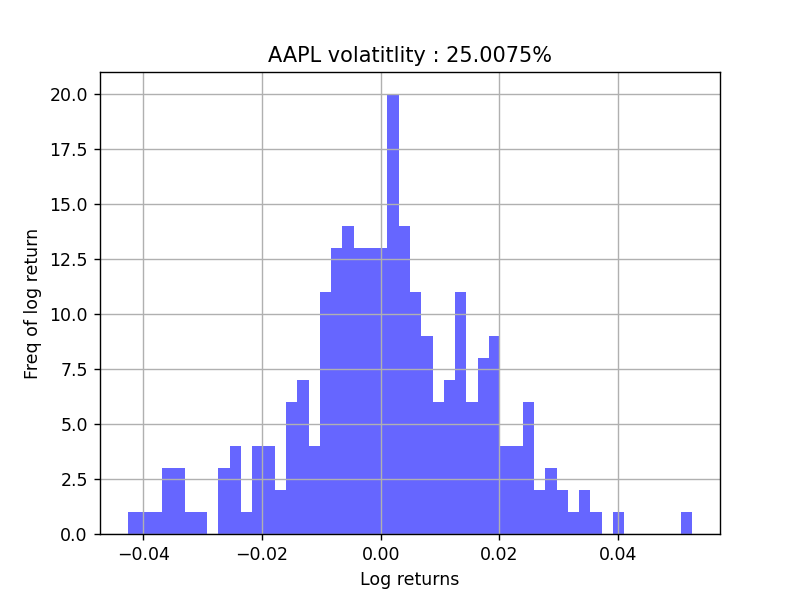

Text(0.5, 1.0, 'AAPL volatitlity : 25.0075%')

In [14]:
# أي أن السوق يتقلب بنسبة %25
fig ,ax = plt.subplots()
data['Log returns'].hist(ax=ax,bins=50,alpha=0.6,color = 'b')
ax.set_xlabel('Log returns')
ax.set_ylabel('Freq of log return')
ax.set_title('AAPL volatitlity : ' + str_vol +'%')

In [15]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns,daily return
Date,,,,,,,,,
2021-01-04 00:00:00-05:00,133.520004,133.610001,126.760002,129.410004,127.874954,143301900,NaN,NaN,NaN
2021-01-05 00:00:00-05:00,128.889999,131.740005,128.429993,131.009995,129.455978,97664900,0.012364,0.012288,0.012364
2021-01-06 00:00:00-05:00,127.720001,131.050003,126.379997,126.599998,125.098274,155088000,-0.033662,-0.034241,-0.033662
2021-01-07 00:00:00-05:00,128.360001,131.630005,127.860001,130.919998,129.367004,109578200,0.034123,0.033554,0.034123
2021-01-08 00:00:00-05:00,132.429993,132.630005,130.229996,132.050003,130.483627,105158200,0.008631,0.008594,0.008631


In [16]:
# rolling يضع عدد محدد من العناصر في مجموعة ونجري عمليات عليها 
data['Close'].rolling(2).sum()

Date
2021-01-04 00:00:00-05:00           NaN
2021-01-05 00:00:00-05:00    260.419998
2021-01-06 00:00:00-05:00    257.609993
2021-01-07 00:00:00-05:00    257.519997
2021-01-08 00:00:00-05:00    262.970001
                                ...    
2021-12-27 00:00:00-05:00    356.610001
2021-12-28 00:00:00-05:00    359.619995
2021-12-29 00:00:00-05:00    358.669998
2021-12-30 00:00:00-05:00    357.580002
2021-12-31 00:00:00-05:00    355.770004
Name: Close, Length: 252, dtype: float64

In [17]:
129.410004 + 131.009995

260.41999899999996

In [18]:
# حساب متوسط السعر لكل عشر خطوات 
data['MA10'] = data['Close'].rolling(10).mean()

In [19]:
data

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns,daily return,MA10
Date,,,,,,,,,,
2021-01-04 00:00:00-05:00,133.520004,133.610001,126.760002,129.410004,127.874954,143301900,NaN,NaN,NaN,NaN
2021-01-05 00:00:00-05:00,128.889999,131.740005,128.429993,131.009995,129.455978,97664900,0.012364,0.012288,0.012364,NaN
2021-01-06 00:00:00-05:00,127.720001,131.050003,126.379997,126.599998,125.098274,155088000,-0.033662,-0.034241,-0.033662,NaN
2021-01-07 00:00:00-05:00,128.360001,131.630005,127.860001,130.919998,129.367004,109578200,0.034123,0.033554,0.034123,NaN
2021-01-08 00:00:00-05:00,132.429993,132.630005,130.229996,132.050003,130.483627,105158200,0.008631,0.008594,0.008631,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-12-27 00:00:00-05:00,177.089996,180.419998,177.070007,180.330002,179.289444,74919600,0.022975,0.022715,0.022975,174.776001
2021-12-28 00:00:00-05:00,180.160004,181.330002,178.529999,179.289993,178.255447,79144300,-0.005767,-0.005784,-0.005767,175.131000
2021-12-29 00:00:00-05:00,179.330002,180.630005,178.139999,179.380005,178.344925,62348900,0.000502,0.000502,0.000502,175.636000


In [20]:
# الفرق بين المتوسط للتحرك الأسي و المتوسط للتحرك السابق 
# المتوسط للتحرك الأسي يعطي ترجيحاً أعلى للأسعار الأخيرة 
# المتوسط للتحرك يعطي ترجيحاً متساوي لجميع القيم 
data['EMA10'] = data['Close'].ewm(span=10).mean()

In [21]:
data

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns,daily return,MA10,EMA10
Date,,,,,,,,,,,
2021-01-04 00:00:00-05:00,133.520004,133.610001,126.760002,129.410004,127.874954,143301900,NaN,NaN,NaN,NaN,129.410004
2021-01-05 00:00:00-05:00,128.889999,131.740005,128.429993,131.009995,129.455978,97664900,0.012364,0.012288,0.012364,NaN,130.289999
2021-01-06 00:00:00-05:00,127.720001,131.050003,126.379997,126.599998,125.098274,155088000,-0.033662,-0.034241,-0.033662,NaN,128.806643
2021-01-07 00:00:00-05:00,128.360001,131.630005,127.860001,130.919998,129.367004,109578200,0.034123,0.033554,0.034123,NaN,129.502899
2021-01-08 00:00:00-05:00,132.429993,132.630005,130.229996,132.050003,130.483627,105158200,0.008631,0.008594,0.008631,NaN,130.234104
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27 00:00:00-05:00,177.089996,180.419998,177.070007,180.330002,179.289444,74919600,0.022975,0.022715,0.022975,174.776001,174.643313
2021-12-28 00:00:00-05:00,180.160004,181.330002,178.529999,179.289993,178.255447,79144300,-0.005767,-0.005784,-0.005767,175.131000,175.488164
2021-12-29 00:00:00-05:00,179.330002,180.630005,178.139999,179.380005,178.344925,62348900,0.000502,0.000502,0.000502,175.636000,176.195771


<IPython.core.display.Javascript object>


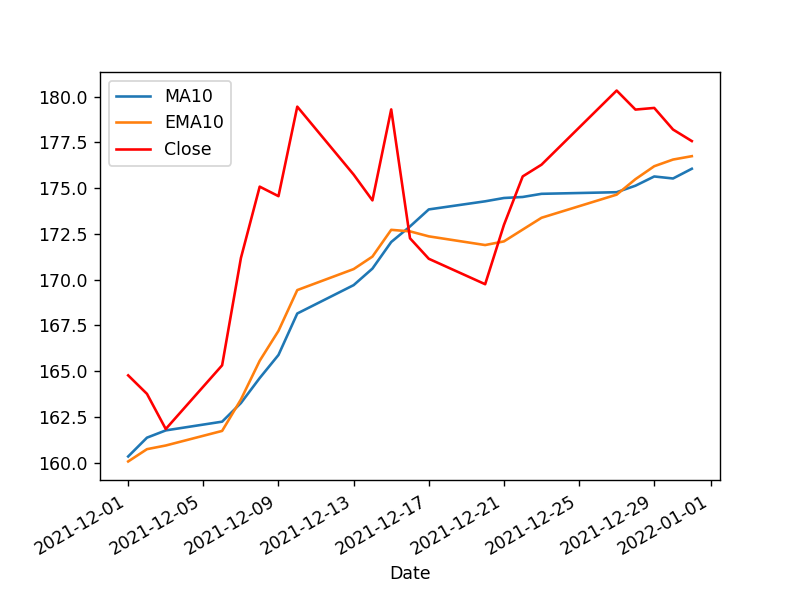

<AxesSubplot:xlabel='Date'>

In [22]:
fig , ax = plt.subplots()
data[['MA10','EMA10']].loc['2021-12-01':].plot(ax=ax)
data[['Close']].loc['2021-12-01':].plot(ax=ax,color ='r')


In [23]:
# MACD ذو 9 لفات الذي هو فرق لفات بين أول إثنين ewm ذو 26 لفة ومقارنته مع ewm ذو 12 لفة من ewm مؤشر فني يتم حسابه عن طريق طرح   
# faster line = MACD
# slower line = Singal line
exp1 = data['Close'].ewm(span =12).mean()
exp2 = data['Close'].ewm(span =26).mean()
data['MACD'] = exp1 - exp2
data['Singal line'] = data['MACD'].ewm(span=9).mean()

In [24]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns,daily return,MA10,EMA10,MACD,Singal line
Date,,,,,,,,,,,,,
2021-12-27 00:00:00-05:00,177.089996,180.419998,177.070007,180.330002,179.289444,74919600,0.022975,0.022715,0.022975,174.776001,174.643313,5.051209,5.174497
2021-12-28 00:00:00-05:00,180.160004,181.330002,178.529999,179.289993,178.255447,79144300,-0.005767,-0.005784,-0.005767,175.131000,175.488164,5.102918,5.160181
2021-12-29 00:00:00-05:00,179.330002,180.630005,178.139999,179.380005,178.344925,62348900,0.000502,0.000502,0.000502,175.636000,176.195771,5.092459,5.146637
2021-12-30 00:00:00-05:00,179.470001,180.570007,178.089996,178.199997,177.171738,59773000,-0.006578,-0.006600,-0.006578,175.525999,176.560176,4.932099,5.103729
2021-12-31 00:00:00-05:00,178.089996,179.229996,177.259995,177.570007,176.545380,64062300,-0.003535,-0.003542,-0.003535,176.057001,176.743782,4.699999,5.022983


<IPython.core.display.Javascript object>


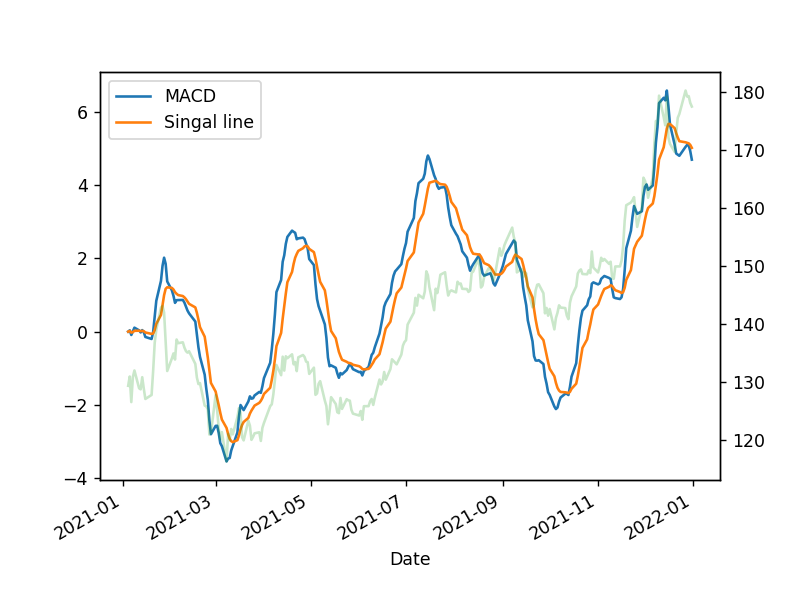

<AxesSubplot:>

In [25]:
# Singal line وبعد ذلك سوف يتقاطع MACD عند حدوث إتجاه جديد أولأ يظهر ذلك على       
# فهذا يشير غالبا أن إتجاهاً جديداً قد تشكل  Singal line بالإبتعاد عن MACD وعندما يبدأ 
# الهدف من كل المؤشرات معرفة متى نشتري ومتى نبيع 
fig ,ax = plt.subplots()
data[['MACD','Singal line']].plot(ax= ax)
data['Close'].plot(ax=ax,alpha = 0.25,secondary_y = True)

In [26]:
# %k مذبذب ستوكاستيك
# %D   متوسط التحرك للقينة السابقة 
high14 = data['High'].rolling(14).max()
low14=   data['Low'].rolling(14).min()
data['%k'] = (data['Close'] - low14)*100/(high14-low14)
data['%D'] = data['%k'].rolling(3).mean()

In [27]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log returns,daily return,MA10,EMA10,MACD,Singal line,%k,%D
Date,,,,,,,,,,,,,,,
2021-12-27 00:00:00-05:00,177.089996,180.419998,177.070007,180.330002,179.289444,74919600,0.022975,0.022715,0.022975,174.776001,174.643313,5.051209,5.174497,87.730039,75.332200
2021-12-28 00:00:00-05:00,180.160004,181.330002,178.529999,179.289993,178.255447,79144300,-0.005767,-0.005784,-0.005767,175.131000,175.488164,5.102918,5.160181,80.640682,78.532530
2021-12-29 00:00:00-05:00,179.330002,180.630005,178.139999,179.380005,178.344925,62348900,0.000502,0.000502,0.000502,175.636000,176.195771,5.092459,5.146637,81.254258,83.208326
2021-12-30 00:00:00-05:00,179.470001,180.570007,178.089996,178.199997,177.171738,59773000,-0.006578,-0.006600,-0.006578,175.525999,176.560176,4.932099,5.103729,73.210577,78.368506
2021-12-31 00:00:00-05:00,178.089996,179.229996,177.259995,177.570007,176.545380,64062300,-0.003535,-0.003542,-0.003535,176.057001,176.743782,4.699999,5.022983,68.916168,74.460334


<IPython.core.display.Javascript object>


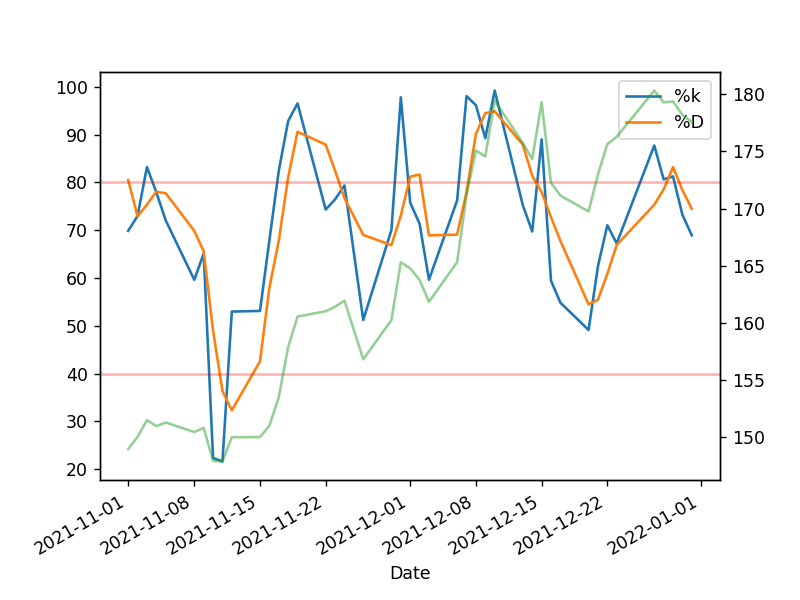

<AxesSubplot:>

In [28]:
# عند تجاوز حد 80 وجب البيع بأفضل لانه في الطريق الى الزيادة ليس من الضروري أن تبيع في الذروة  
# المهم أن تكون عدد الصفقات الرابحة أكثر من الخاسرة 
#(20,50,80)أن الحدود المتعارف عليها  
# طبعاً كل شي نسبي 
fig , ax = plt.subplots()
data[['%k','%D']].loc['2021-11-01':].plot(ax=ax)
ax.axhline(80,c = 'r',alpha=0.3)
ax.axhline(40,c = 'r',alpha=0.3)
data['Close'].loc['2021-11-01':].plot(ax=ax,alpha = 0.50,secondary_y = True)

